In [88]:
# presentado por ANDRES FELIPE CAICEDO
#Analisis de datos Etap 3 UNAD 
# Importar os para lectura del dataset desde el SO
import os
# Importar pandas y numpy para manipulación de datos
import pandas as pd
import numpy as np
# Importamos sklearn para poder aplicar el modelo arbol de decision
from sklearn import tree
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Importamos matplotlib y seaborn 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {'size': 12}
plt.rc('font', **font)

In [96]:
# Importamos el dataset y validamos su estructura
os.chdir("C:\\Users\\felipe.caicedo\\Documents\\analis tarea 3\\Dataset_Titanic")
datos = pd.read_csv("train.csv", delimiter=',')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
num_rows, num_cols = datos.shape
print("\033[1mDimensiones del dataset:\033[0m")
print("\033[1mNúmero de filas:\033[0m", num_rows, ", \033[1mNúmero de columnas:\033[0m", num_cols)

Dimensiones del dataset:
Número de filas: 891 , Número de columnas: 12


In [98]:
# Exploración de datos

num_rows, num_cols = datos.shape
print("\033[1mDimensiones:\033[0m")
print("\033[1mNúmero de filas:\033[0m", num_rows, ", \033[1mNúmero de columnas:\033[0m", num_rows)

Dimensiones:
Número de filas: 891 , Número de columnas: 891


In [99]:
columns_names = datos.columns
print("\033[1mNombre columnas :\033[0m \n")
print(columns_names)

Nombre columnas : 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [100]:
print("\033[1mNúmero de datos faltantes por cada campo:\033[0m")
datos.isna().sum()

Número de datos faltantes por cada campo:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
print("\033[1mTipos de datos :\033[0m \n")
print(datos.dtypes)

Tipos de datos : 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [102]:
#  Limpieza e imputación de datos
datos['Age'] = datos['Age'].fillna(round(datos['Age'].mean()))
datos['Cabin'] = datos['Cabin'].fillna("NE")
datos['Embarked'] = datos['Embarked'].fillna("NE")
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [109]:
#  Limpieza e imputación de datos

print("\033[1m datos\033[0m ")
# Calcular el rango intercuartil (IQR) para la columna 'Edad'
Q1_edad = datos['Age'].quantile(0.25)
Q3_edad = datos['Age'].quantile(0.75)
IQR_edad = Q3_edad - Q1_edad

# Calcular el rango intercuartil (IQR) para la columna 'Tarifa'
Q1_tarifa = datos['Fare'].quantile(0.25)
Q3_tarifa = datos['Fare'].quantile(0.75)
IQR_tarifa = Q3_tarifa - Q1_tarifa

# Identificar valores atípicos en 'Edad' y 'Tarifa'
outliers_edad = (datos['Age'] < (Q1_edad - 1.5 * IQR_edad)) | (datos['Age'] > (Q3_edad + 1.5 * IQR_edad))
outliers_tarifa = (datos['Fare'] < (Q1_tarifa - 1.5 * IQR_tarifa)) | (datos['Fare'] > (Q3_tarifa + 1.5 * IQR_tarifa))

# Extraer los valores atípicos
outliers_edad_values = datos[outliers_edad]
outliers_tarifa_values = datos[outliers_tarifa]

print('\033[1mDatos anomalos edad:\033[0m ', len(outliers_edad_values))
print('\033[1mDatos anomalos tarifa:\033[0m ', len(outliers_tarifa_values))

# Limpiar el dataset de los valores atípicos
datos.drop(datos[outliers_edad | outliers_tarifa].index, inplace=True)

 datos 
Datos anomalos edad:  42
Datos anomalos tarifa:  24


In [108]:
print('\033[1mValidamos si hay datos duplicados:\033[0m')
datos.duplicated()


Validamos si hay datos duplicados:


0      False
2      False
3      False
4      False
5      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 721, dtype: bool

Distribución de la variable Survived en el dataset:


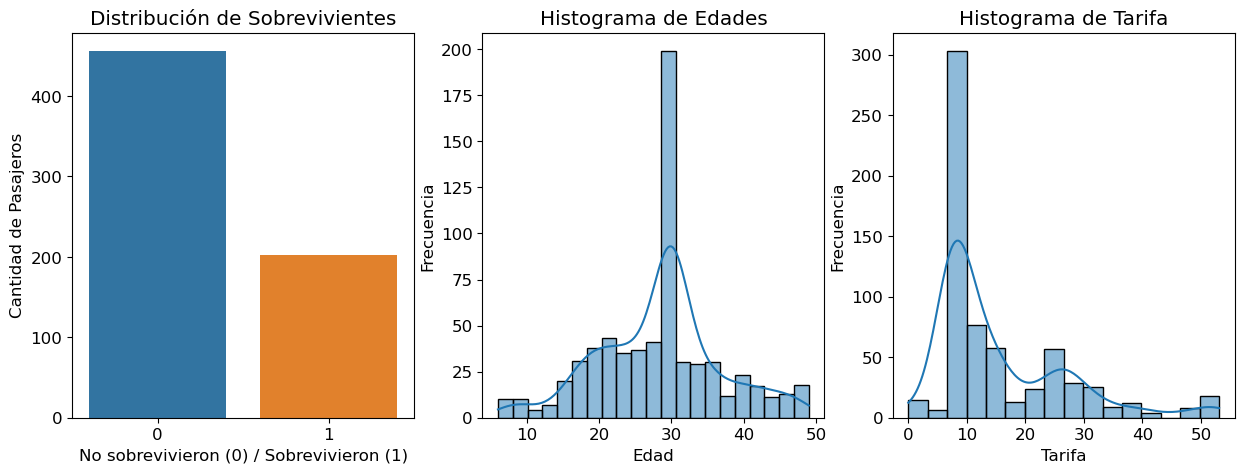

In [110]:
# Estadística 
print('\033[1mDistribución de la variable Survived en el dataset:\033[0m')
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
# Gráfico de barras de la distribución de 'Survived'
sns.countplot(x='Survived', data=datos, ax = axes[0])
axes[0].set_title('Distribución de Sobrevivientes')
axes[0].set_xlabel('No sobrevivieron (0) / Sobrevivieron (1)')
axes[0].set_ylabel('Cantidad de Pasajeros')

sns.histplot(datos['Age'], kde=True, ax = axes[1])
axes[1].set_title('Histograma de Edades')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

sns.histplot(datos['Fare'], kde=True, ax = axes[2])
axes[2].set_title('Histograma de Tarifa')
axes[2].set_xlabel('Tarifa')
axes[2].set_ylabel('Frecuencia')

plt.show()

In [55]:
clase_counts = datos['Pclass'].value_counts()

print('\033[1mnumero  pasajeros en cada clase:\033[0m\n')
print(clase_counts)

numero  pasajeros en cada clase:

3    438
2    145
1     75
Name: Pclass, dtype: int64


In [58]:
# Verificamos tabla de correlación
datos.corr()

C:\Users\felipe.caicedo\AppData\Local\Temp\ipykernel_15748\3326293549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.058903,-0.067991,-0.064146,0.029625,-0.078688,-0.004759,0.025906
Survived,-0.058903,1.000000,-0.255393,0.508468,-0.015799,-0.024417,0.035559,0.187159
Pclass,-0.067991,-0.255393,1.000000,-0.016877,-0.264349,0.087768,0.076003,-0.601840
Sex,-0.064146,0.508468,-0.016877,1.000000,-0.075588,0.161602,0.280771,0.167184
Age,0.029625,-0.015799,-0.264349,-0.075588,1.000000,-0.247396,-0.061440,0.082643
SibSp,-0.078688,-0.024417,0.087768,0.161602,-0.247396,1.000000,0.368485,0.441296
Parch,-0.004759,0.035559,0.076003,0.280771,-0.061440,0.368485,1.000000,0.382879
Fare,0.025906,0.187159,-0.601840,0.167184,0.082643,0.441296,0.382879,1.000000


Verifiquemos la tasa de supervivencia por clase, genero y grupo de edad:


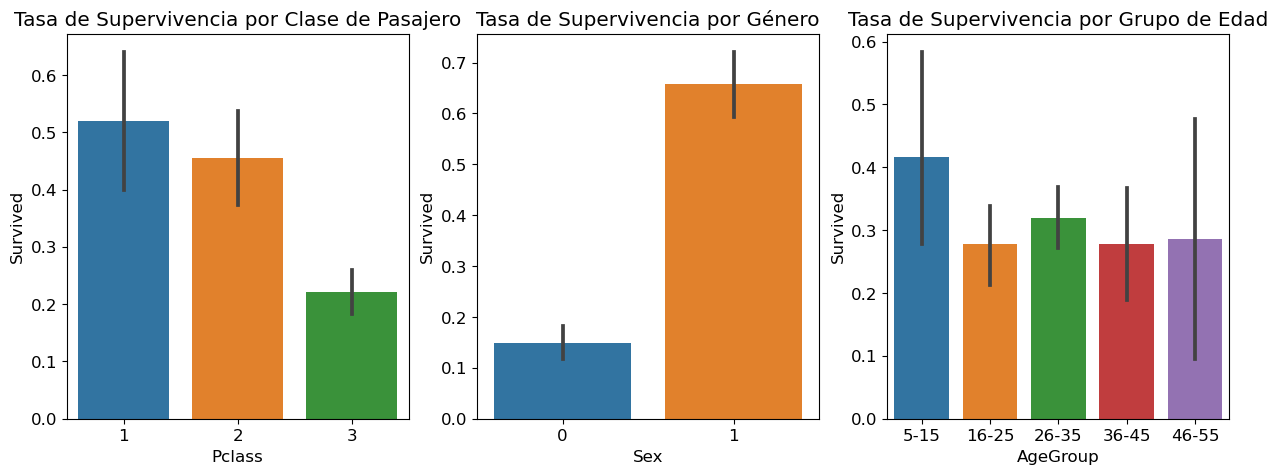

Cantidad de personas en clase#1:  75
Cantidad de personas en clase#2:  145
Cantidad de personas en clase#3:  438
--------------------------------------------

Cantidad de personas en hombres:  454
Cantidad de personas en mujeres:  204
--------------------------------------------

Cantidad de personas entre 5 y 15 años:  36
Cantidad de personas entre 16 y 25 años:  183
Cantidad de personas entre 26 y 35 años:  328
Cantidad de personas entre 36 y 45 años:  90
Cantidad de personas entre 45 y 55 años:  19


In [60]:
print('\033[1mVerifiquemos la tasa de supervivencia por clase, genero y grupo de edad:\033[0m')
# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Tasa de supervivencia por clase de pasajero
sns.barplot(x='Pclass', y='Survived', data=datos, ax=axes[0])
axes[0].set_title('Tasa de Supervivencia por Clase de Pasajero')

# Gráfico 2: Tasa de supervivencia por género
sns.barplot(x='Sex', y='Survived', data=datos, ax=axes[1])
axes[1].set_title('Tasa de Supervivencia por Género')

# Crear intervalos de edad (por ejemplo, 0-9, 10-19, 20-29, ...)
datos['AgeGroup'] = pd.cut(datos['Age'], bins=[5, 15, 25, 35, 45, 55], labels=['5-15', '16-25', '26-35', '36-45', '46-55'])

# Gráfico 3: Tasa de supervivencia por grupo de edad
sns.barplot(x='AgeGroup', y='Survived', data=datos, ax=axes[2])
axes[2].set_title('Tasa de Supervivencia por Grupo de Edad')

plt.show()

print('\033[1mCantidad de personas en clase#1\033[0m: ', datos[datos['Pclass'] == 1]['Pclass'].count())
print('\033[1mCantidad de personas en clase#2\033[0m: ', datos[datos['Pclass'] == 2]['Pclass'].count())
print('\033[1mCantidad de personas en clase#3\033[0m: ', datos[datos['Pclass'] == 3]['Pclass'].count())
print('--------------------------------------------\n')
print('\033[1mCantidad de personas en hombres\033[0m: ', datos[datos['Sex'] == 0]['Sex'].count())
print('\033[1mCantidad de personas en mujeres\033[0m: ', datos[datos['Sex'] == 1]['Sex'].count())
print('--------------------------------------------\n')
print('\033[1mCantidad de personas entre 5 y 15 años\033[0m: ', datos[(datos['Age'] >= 5) & (datos['Age'] <= 15)]['Age'].count())
print('\033[1mCantidad de personas entre 16 y 25 años\033[0m: ', datos[(datos['Age'] >= 16) & (datos['Age'] <= 25)]['Age'].count())
print('\033[1mCantidad de personas entre 26 y 35 años\033[0m: ', datos[(datos['Age'] >= 26) & (datos['Age'] <= 35)]['Age'].count())
print('\033[1mCantidad de personas entre 36 y 45 años\033[0m: ', datos[(datos['Age'] >= 36) & (datos['Age'] <= 45)]['Age'].count())
print('\033[1mCantidad de personas entre 45 y 55 años\033[0m: ', datos[(datos['Age'] >= 46) & (datos['Age'] <= 55)]['Age'].count())


In [64]:
#Equilibrar el conjunto de datos

survived_counts = datos['Survived'].value_counts()

print('Sobrevivientes (1) y No Sobrevivientes (0):')
print(survived_counts)

# Calcular la proporción
proporciones = survived_counts / len(datos)
print('\nProporción de Sobrevivientes y No Sobrevivientes:\n')
print(proporciones)
print('\n\033[1m se puede  evidenciar un desbalance en las proporciones\033[0m')

Sobrevivientes (1) y No Sobrevivientes (0):
0    456
1    202
Name: Survived, dtype: int64

Proporción de Sobrevivientes y No Sobrevivientes:

0    0.693009
1    0.306991
Name: Survived, dtype: float64

 se puede  evidenciar un desbalance en las proporciones


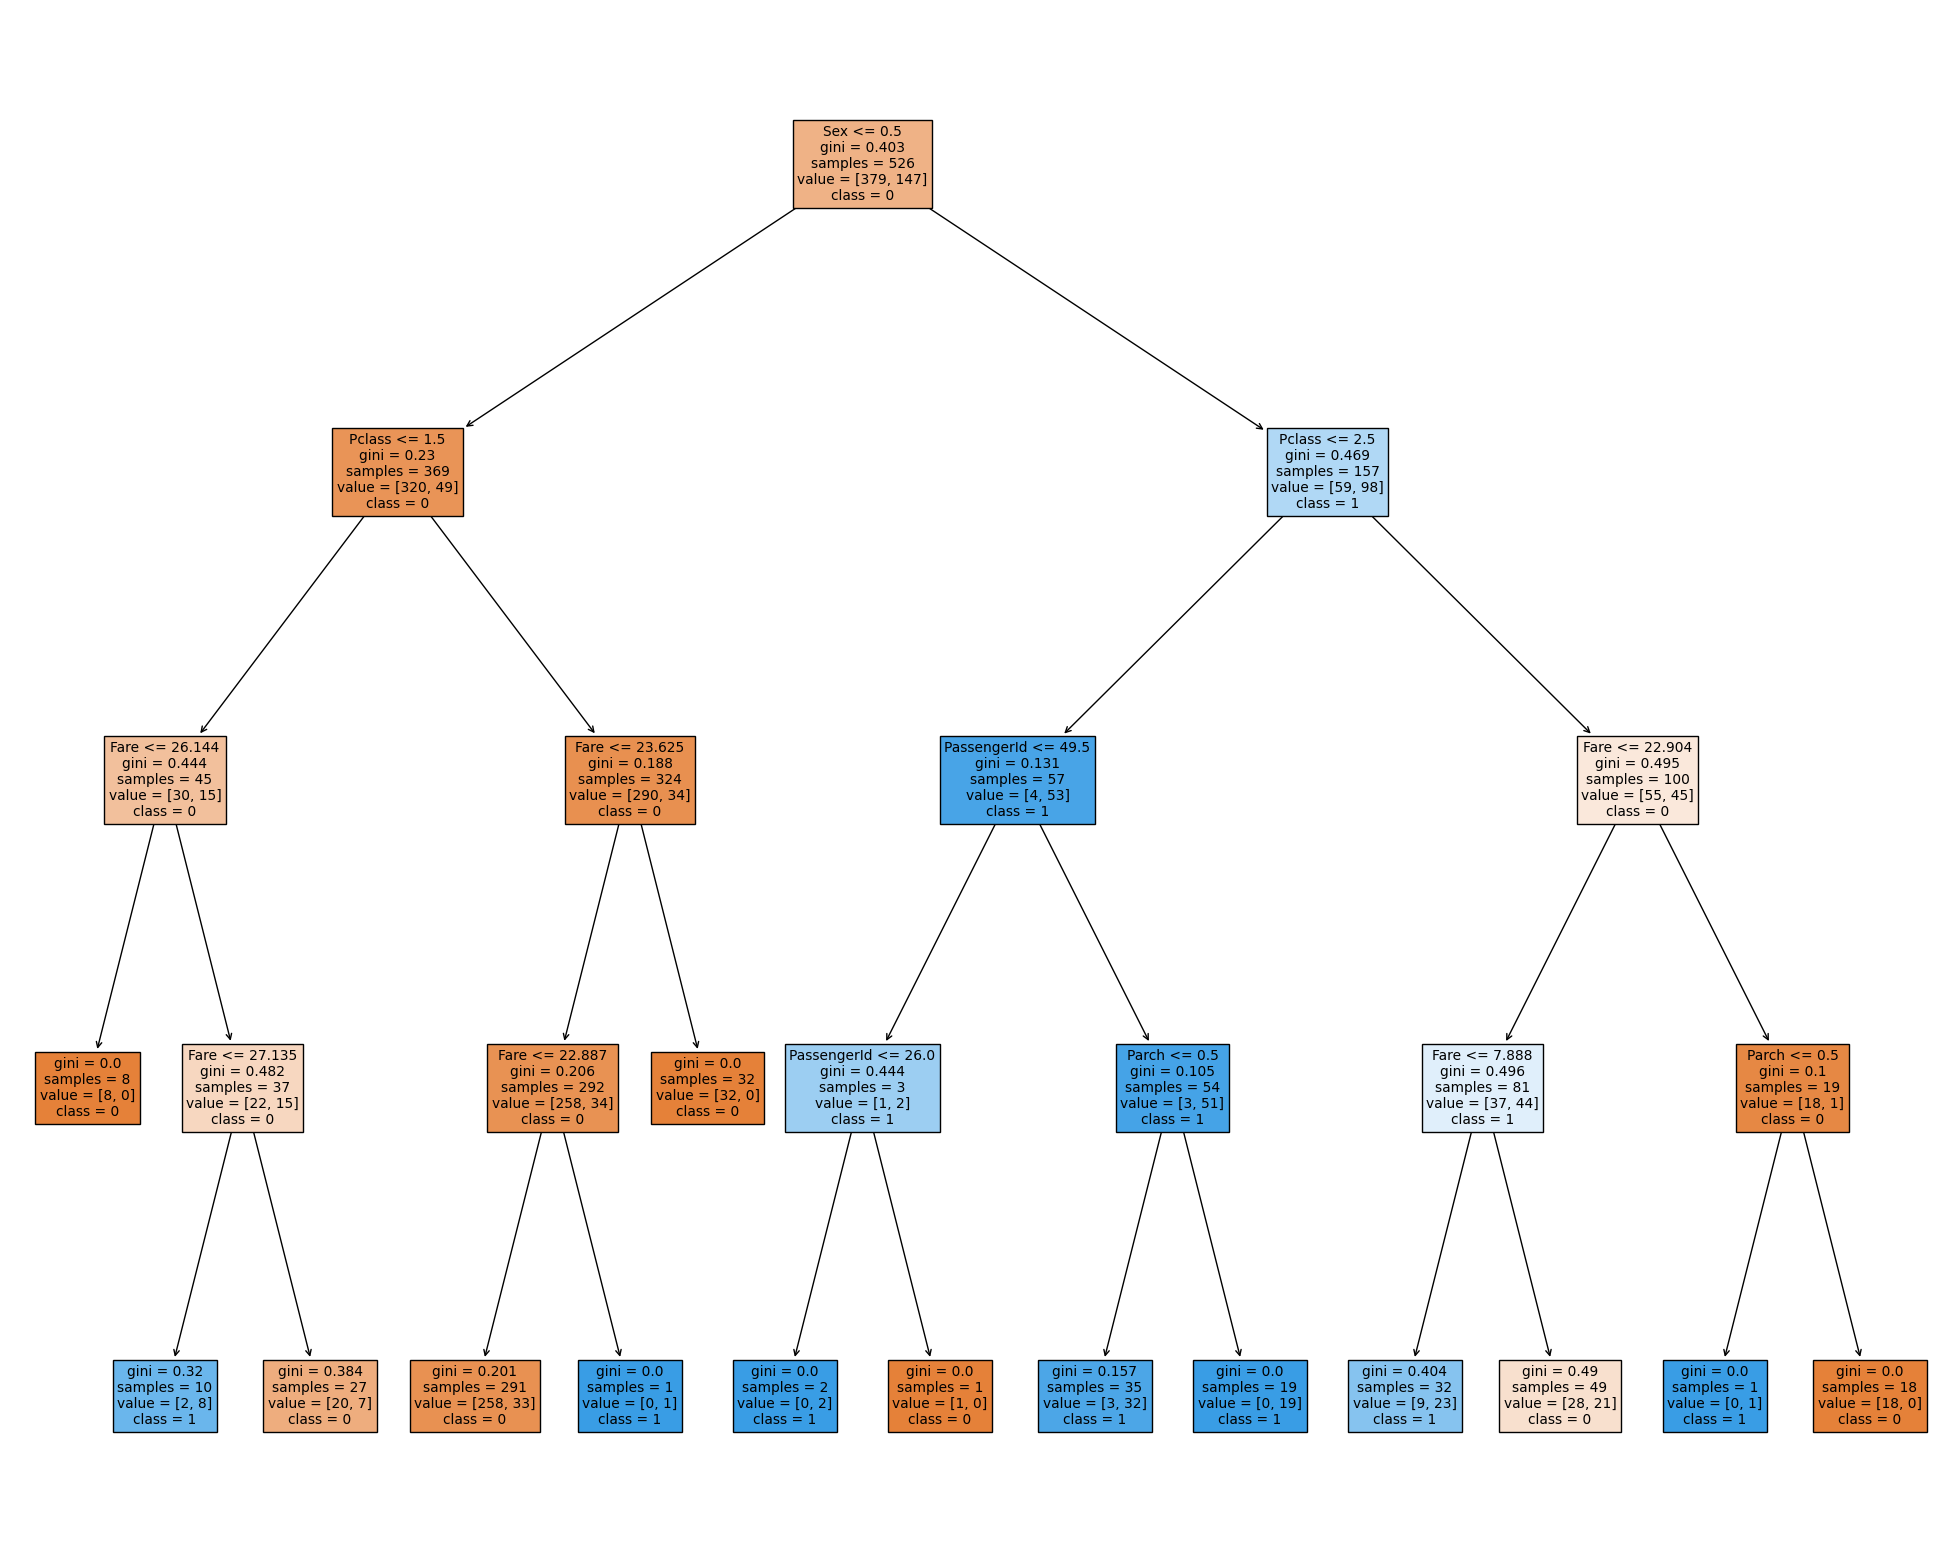

In [118]:
# División del dataset 
# Mapeo de los datos a valores númerico
# evaluar el modelo de arbol de decisión

datos['Survived'].replace(('No', 'Si'), (0, 1), inplace = True)
datos['Sex'].replace(('male', 'female'), (0,1), inplace = True)

# Eliminación de datos categóricos que no ayudaran en el modelo
# Separación en datos dependientes e independiente
X = datos.drop(columns = ['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Age'])
Y = datos['Survived']

# Separación datos de entrenamiento y prueba con razón de pareto 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,random_state=0)

# Creamos nuestro modelo de regresión lineal
arbol = DecisionTreeClassifier(max_depth=4)

# Aplicamos el modelos al conjunto de entrenamiento
arbol_sobrevivir = arbol.fit(X_train, Y_train)

# Definimos el tamaño de nuestra visualización
fig = plt.figure(figsize=(25,20))

# Construimos nuestro árbol de decisión para ser visualizado
tree.plot_tree(arbol_sobrevivir, feature_names=list(X_train.columns.values),
              class_names=list({"0", "1"}), filled=True)

# Visualizamos nuestro árbol de decisión
plt.show()


In [120]:
 #  validación con el conjunto de prueba
    
Y_pred = arbol_sobrevivir.predict(X_test)
mapeo = {0: "SI", 1: "NO"}
print('\033[1mPredicción de sobrevivientes:\033[0m \n\n', np.vectorize(mapeo.get)(Y_pred))

# Verificamos nuestro modelo a través de una matriz de confusión
print('\n \033[1mConteo de predicciones exitos y no exitosas:\033[0m')
matriz_confusion = confusion_matrix(Y_test, Y_pred)
matriz_confusion

Predicción de sobrevivientes: 

 ['SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'NO' 'SI' 'SI' 'NO' 'SI' 'SI'
 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'NO' 'SI' 'SI' 'SI'
 'SI' 'NO' 'NO' 'SI' 'NO' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'SI'
 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'SI' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO'
 'SI' 'NO' 'NO' 'SI' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO' 'SI' 'SI' 'SI' 'SI'
 'SI' 'SI' 'SI' 'SI' 'NO' 'NO' 'NO' 'NO' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI'
 'NO' 'NO' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO' 'NO' 'SI' 'SI' 'NO' 'NO' 'SI'
 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'SI' 'SI'
 'SI' 'SI' 'SI' 'NO' 'SI' 'NO' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'SI' 'SI'
 'SI' 'NO' 'SI' 'SI' 'SI' 'NO']

 Conteo de predicciones exitos y no exitosas:


array([[72,  5],
       [24, 31]], dtype=int64)

In [122]:
## Validamos la precisión de nuestro modelo (validaciones correctas)

Presicion_Global = np.sum(matriz_confusion.diagonal())/np.sum(matriz_confusion)
print("\033[1m precisión del modelo en terminos generales :\033[0m", np.round(Presicion_Global*100, 2), "% ")

## Validamos la precisión de nuestro modelo (validación correcta de No Sobrevientes)
Presicion_death = matriz_confusion[1,1]/np.sum(matriz_confusion[1,])
print("\033[1m precisión del modelo en sobrevivientes:\033[0m", np.round(Presicion_death*100, 2), "% ")

## Validamos la precisión de nuestro modelo (validación correcta de Sobrevientes)
Presicion_alive = matriz_confusion[0,0]/np.sum(matriz_confusion[0,])
print("\033[1m precisión del modelo en no sobrevivientes:\033[0m", np.round(Presicion_alive*100, 2), "% ")



 precisión del modelo en terminos generales : 78.03 % 
 precisión del modelo en sobrevivientes: 56.36 % 
 precisión del modelo en no sobrevivientes: 93.51 % 
